<a href="https://colab.research.google.com/github/shairamore/Heart-Attack-Prediction-Using-Machine-Learning/blob/main/Heart_Attack_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Prediction Project

---



---


This machine learning project aimed to predict if a patient is highly likely to have a heart attack based on his/her demographic and health information, which includes the following:
* Age
* Sex
* Resting blood pressure
* Chest pain level
* Cholesterol level
* Fasting blood sugar level
* Angina type
* Resting ECQ results; and
* Maximum heart rate

This project made use of Gaussian Naive Bayes and Logistic Regression models in predicting the output which is whether a patient will have a heart attack or not. The two models were then compared for their accuracy and f1-scores to check which model performs best in predicting the results for each individual.


First we import the necessary libraries.

In [ ]:
'''importing the required modules'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skl
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

Then we read the CSV file containing the dataset.

In [ ]:
''''Reading the CSV file'''

heart = pd.read_csv("/content/heart.csv")

#discarding the last 4 columns
heart = heart[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','output']]

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   output    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


After seeing the data and its summary, we now create different graphs to further explore and investigate our dataset.



---


# Plotting Graph- Age

The graph counts the number of patients for each age group.




0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


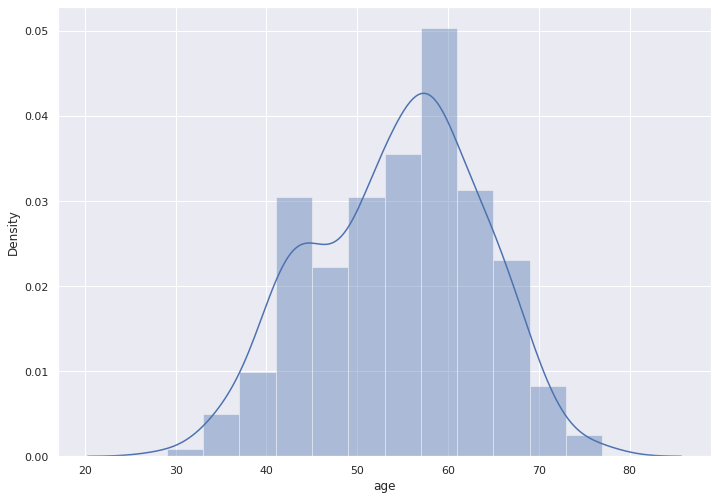

In [ ]:
X_age = heart[heart.columns[0]]      #Age feature on X-axis
print(X_age.head())

Y_prediction = heart['output']   #Prediction (Output) feature on Y-axis
print(Y_prediction.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(heart['age'])


# Plotting Graph - Age Vs Output
This graph helps give us a quick visualization of the relationship between age and the output (having a heart attack or not).


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


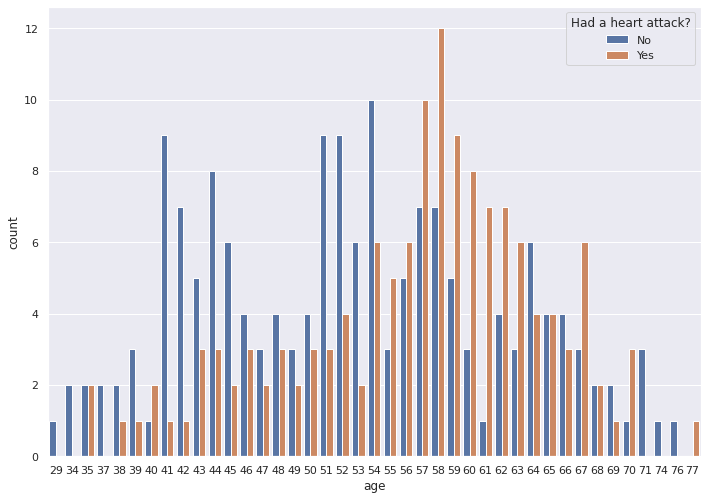

In [ ]:
heart['output_desc'] = heart.output.map({0: 'Low Chances', 1: 'High Chances'})

# making the graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(X_age,data=heart,hue='output_desc')
plt.legend(title='Had a heart attack?', loc='upper right', labels=['No', 'Yes'])


## Based on the graphs:
1. There are more number of patients in the age group 51 to 60.
2. There seems to be a trend in the data where the number of heart attacks recorded increased between ages 54 to 67.



---










# Plotting Graph- Exng (Exercise Induced Angina) 

Counting the number of Patients with exercise-induced angina and number of patients without exercise-induced angina.

*Exercise-induced angina means angina or chest pain triggered by physical activity.*


0    0
1    0
2    0
3    0
4    1
Name: exng, dtype: int64


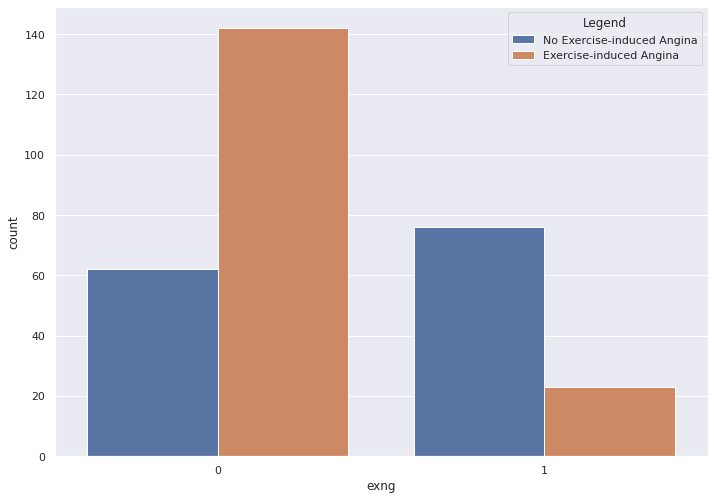

In [ ]:
X_exng = heart[heart.columns[8]]      #Exng feature on X-axis
print(X_exng.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=X_exng,data=heart,hue='output') 
plt.legend(title='Legend', loc='upper right', labels=['No Exercise-induced Angina', 'Exercise-induced Angina'])

# Plotting Graph - Exng Vs Output
Comparing which have more occurrences of heart attacks - with or without exercise-induced angina.



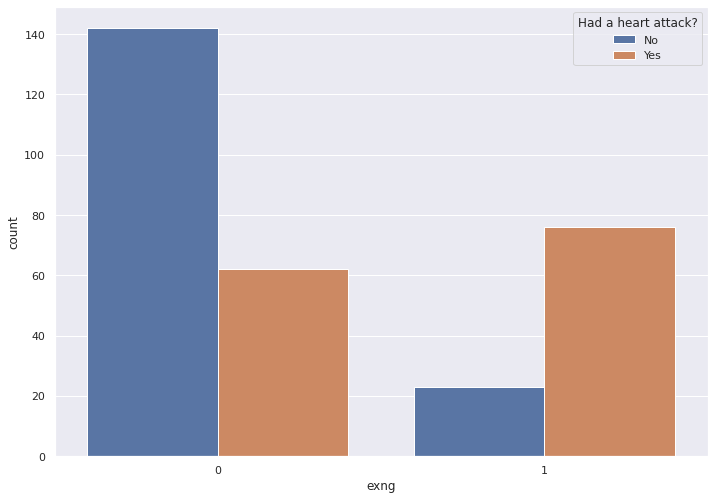

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x=X_exng,data=heart,hue='output_desc')
plt.legend(title='Had a heart attack?', loc='upper right', labels=['No', 'Yes'])

# Based on the graphs:

1. There are more people without exercise induced angina in the dataset, but most of them did not have a heart attack.
2. Congruent with usual assumptions, more individuals with exercise-induced angina had a heart attack.

---





# Plotting Graph - CP (Chest Pain)
Categorizing based on type of chest pain:

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

0    3
1    2
2    1
3    1
4    0
Name: cp, dtype: int64


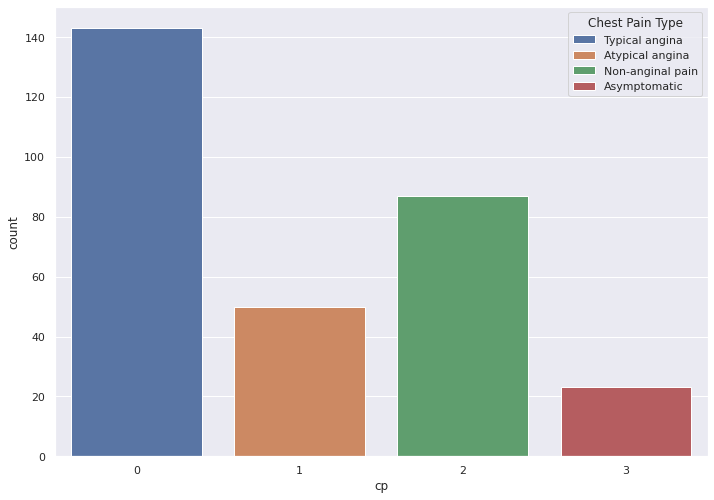

In [ ]:
X_cp = heart[heart.columns[2]]      #Cp feature on X-axis
print(X_cp.head())

cp_labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=X_cp,data=heart, hue=X_cp, dodge=False)
plt.legend(title='Chest Pain Type', loc='upper right', labels=cp_labels)

# Plotting Graph - CP Vs Output

Comparing which chest pain type is associated with more heart attack occurrences.

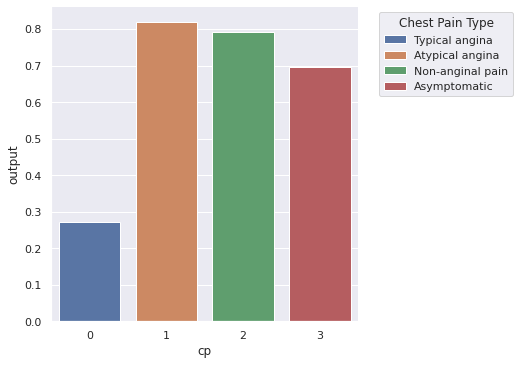

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.catplot(x="cp", y="output", data=heart, kind="bar", hue="cp", dodge=False, ci=None)
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1.0), labels=cp_labels)

# Based on the graphs: 
1. Number of people having different levels of Chest Pain (based on count): L0 > L2 > L1 > L3
2. People with Level 1 chest pain or *atypical angina* had more occurrences of heart attacks compared to others.
3. Ranking the heart attack occurrences based on different levels of chest pain: L1 > L2 > L3 > L0


---





# Plotting Graph - RestECG (Resting ECG rate)

Categorizing based on:

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

0    0
1    1
2    0
3    1
4    1
Name: restecg, dtype: int64


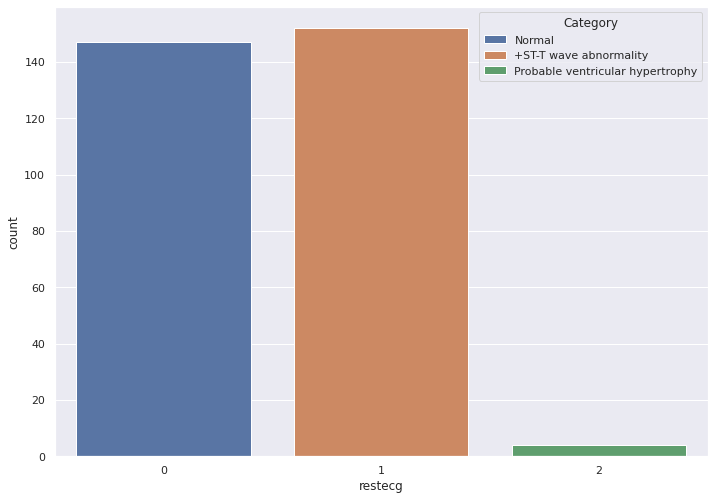

In [ ]:
X_restecg = heart[heart.columns[6]]      #restecg feature on X-axis
print(X_restecg.head())

restecg_labels=['Normal', '+ST-T wave abnormality', 'Probable ventricular hypertrophy']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=X_restecg,data=heart, hue=X_restecg, dodge=False)
plt.legend(title='Category', loc='upper right', labels=restecg_labels)

# Plotting Graph - RestECG Vs Output

Comparing which level of Resting ECG rate is associated with more heart attack occurrences.

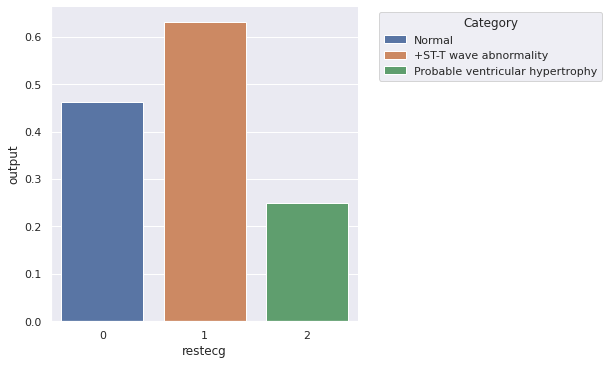

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="restecg", y="output", data=heart, kind="bar", hue="restecg", dodge=False, ci=None)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1.0), labels=restecg_labels)

# Based on the graphs:
1. Number of patients having different types of resting ECG rate (based on count): L1 > L0 > L2
2. The number of patients with Level 2 of resting ECG rate (definite left ventricular hypertrophy by Estes' criteria) is very low.
3. Ranking the occurrences of heart attack versus different types of resting ECG: L1 > L0(Normal) > L2

---
# Plotting Graph - Sex vs. Output

Visualizing the relationship between the patient's sex vs. the outcome (high vs. low chances of having a heart attack)

0      male
1      male
2    female
3      male
4    female
Name: sex_desc, dtype: object
0    High Chances
1    High Chances
2    High Chances
3    High Chances
4    High Chances
Name: output_desc, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


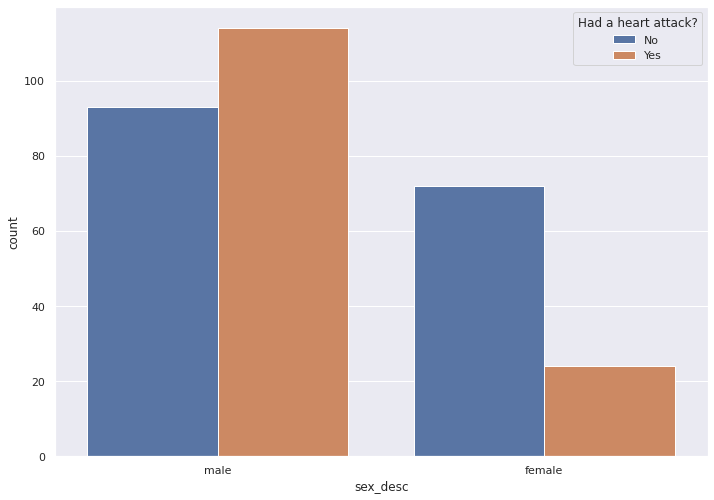

In [ ]:
# Sex vs. Outcome / Prediction

heart['sex_desc'] = heart.sex.map({0: 'female', 1: 'male'})

X_sex = heart['sex_desc']           # Sex feature on X-axis
print(X_sex.head())

Y_prediction = heart['output_desc']   # Prediction (Output) feature on Y-axis
print(Y_prediction.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(X_sex,data=heart,hue='output_desc')
plt.legend(title='Had a heart attack?', loc='upper right', labels=['No', 'Yes'])

# Based on the graph:
1. There are more male individuals in the dataset.
2. More than 100 males had a heart attack as compared to females, which only recorded around 20 heart attacks.

---
# Plotting Graph - Resting Blood Pressure vs. Output

Visualizing the relationship of blood pressure levels to the output.

0    145
1    130
2    130
3    120
4    120
Name: trtbps, dtype: int64
0    High Chances
1    High Chances
2    High Chances
3    High Chances
4    High Chances
Name: output_desc, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


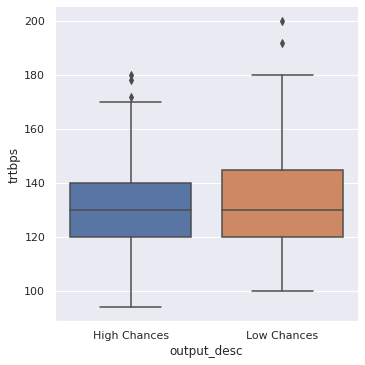

In [ ]:
# Resting BP vs. Outcome / Prediction

trtbps = heart[heart.columns[3]]          # resting blood pressure
print(trtbps.head())

Y_prediction = heart['output_desc']            # Prediction (Output) feature on Y-axis
print(Y_prediction.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(Y_prediction, trtbps, data=heart, kind="box")

# Based on the graph:
1. Most individuals who had heart attacks had a resting blood pressure between 120 to 140.
2. It is notable that individuals who had heart attacks had a lower blood pressure in general (max bp approx. 180) compared to those who did not (max bp approx. 200).

---
# Plotting Graph - Fasting Blood Sugar vs. Output

Visualizing the relationship of fasting blood sugar levels to the output.

0    1
1    0
2    0
3    0
4    0
Name: fbs, dtype: int64
0    High Chances
1    High Chances
2    High Chances
3    High Chances
4    High Chances
Name: output_desc, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


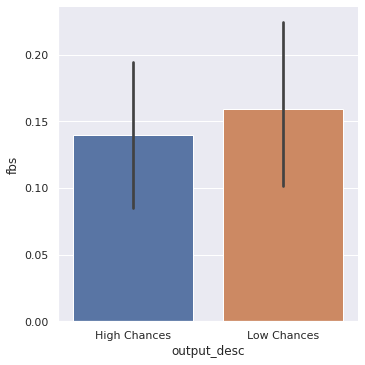

In [ ]:
# Fasting blood sugar vs. Outcome / Prediction

fbs = heart['fbs']             # fasting blood sugar level
print(fbs.head())

Y_prediction = heart['output_desc']   # Prediction (Output) feature on Y-axis
print(Y_prediction.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(Y_prediction, fbs, data=heart, kind='bar')

# Based on the graph:
1. The average fbs value is relatively close for both outputs (high vs. low chances of heart attack).
2. Individuals who had heart attacks had a lower fasting blood sugar in general.

---
# Plotting Graph - Maximum Heart Rate vs. Output

Visualizing the relationship between maximum heart rate and the output.

0    150
1    187
2    172
3    178
4    163
Name: thalachh, dtype: int64
0    High Chances
1    High Chances
2    High Chances
3    High Chances
4    High Chances
Name: output_desc, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


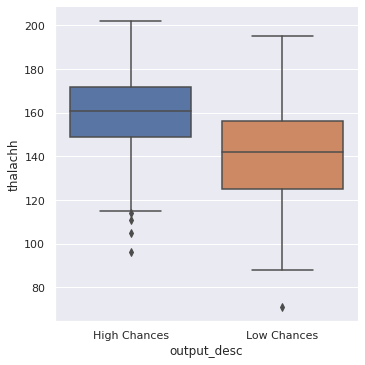

In [ ]:
# Max heart rate vs. Outcome / Prediction

thalachh = heart['thalachh']         # max heart rate achieved
print(thalachh.head())

Y_prediction = heart['output_desc']   # Prediction (Output) feature on Y-axis
print(Y_prediction.head())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(Y_prediction, thalachh, data=heart, kind='box')

# Based on the graph:
1. Those who had heart attacks have significantly higher maximum heart rate achieved compared to those who did not.
2. On average, those who had heart attacks had a maximum heart rate of 160 bpm.

---
# Combined Plots

For better understanding of the relationships between different independent variables, we create combined plots as shown below.

Text(0.5, 0.98, 'Age V/s Cholestrol')

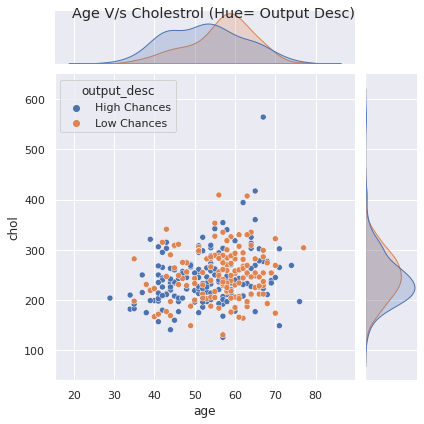

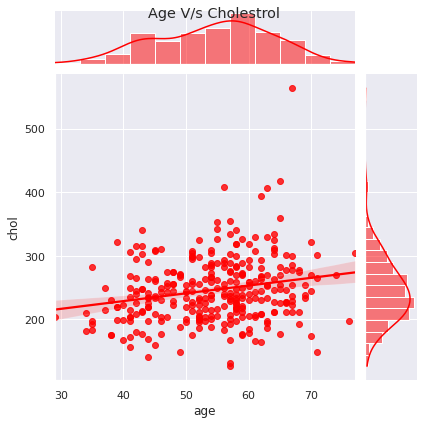

In [ ]:
#Joint plot between Age and Cholestrol

jointplot1 = sns.jointplot(x= 'age',y='chol',data=heart,kind='scatter',hue='output_desc')   #with output as 'hue'
jointplot1.fig.suptitle("Age V/s Cholestrol (Hue= Output Desc)" )


jointplot2 = sns.jointplot(x= 'age',y='chol',data=heart,kind='reg',color='red')       #without output as 'hue'
jointplot2.fig.suptitle("Age V/s Cholestrol")


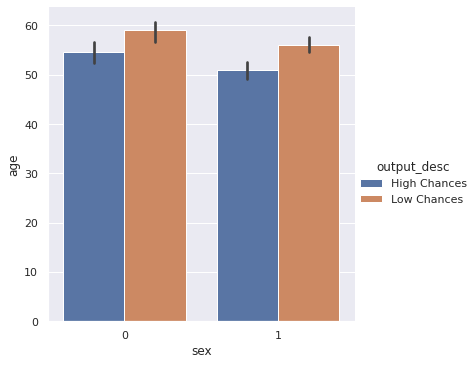

In [ ]:
# Age and Sex vs. Outcome / Prediction

sns.catplot(x="sex", y="age", hue="output_desc", data=heart, kind="bar")

# Here 0 denotes female
# Here 1 denotes male

# Analyzing the Combined Graphs: 

> **KEYNOTE-**
Total cholesterol levels less than 200 mg/dL are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high. 

> **Graph 1-**
1. As the age increases, people with borderline cholesterol or high cholesterol level have high chances of having heart attack.
2. Young patients with borderline cholesterol level still have less chances.


> **Graph 2-**
1. Patients with high/borderline cholesterol level mostly belong to the age group of 40-65.
2. There are still patients with normal/ less cholestrol level in the above range.

> **Graph 3-**
1. Females in the dataset tend to be older than the males.
2. Older females had more heart attack occurrences (around 60 occurrences) compared to males (around 55 occurrences).


Now that we have finished visualizing the dataset, we can apply statistical methods to further analyze it.

---
# CORRELATION - 

Computing Correlation between every feature and plotting a heat map to ensure that the features are independent of each other.


> Correlation Doc. 
    
1. correlation = 1 means they have perfect correlation(like both are increasing graphs) 
2. -ve corr. means one is increasing and other is decreasing
3. range of correlation is [-1,1]


> Heatmap

This heat map depicts which feature is correlated with which feature the most 


> Pivot Table Heat Map

Pivot function is used to reshaped a given DataFrame organized by given index / column values. 



               age       sex        cp  ...  thalachh      exng    output
age       1.000000 -0.098447 -0.068653  ... -0.398522  0.096801 -0.225439
sex      -0.098447  1.000000 -0.049353  ... -0.044020  0.141664 -0.280937
cp       -0.068653 -0.049353  1.000000  ...  0.295762 -0.394280  0.433798
trtbps    0.279351 -0.056769  0.047608  ... -0.046698  0.067616 -0.144931
chol      0.213678 -0.197912 -0.076904  ... -0.009940  0.067023 -0.085239
fbs       0.121308  0.045032  0.094444  ... -0.008567  0.025665 -0.028046
restecg  -0.116211 -0.058196  0.044421  ...  0.044123 -0.070733  0.137230
thalachh -0.398522 -0.044020  0.295762  ...  1.000000 -0.378812  0.421741
exng      0.096801  0.141664 -0.394280  ... -0.378812  1.000000 -0.436757
output   -0.225439 -0.280937  0.433798  ...  0.421741 -0.436757  1.000000

[10 rows x 10 columns]


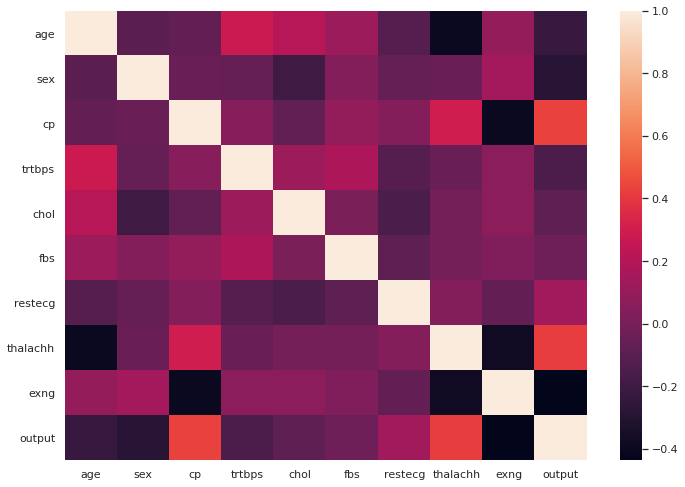

In [ ]:

heart_correlation = heart.corr()
print(heart_correlation)


sns.heatmap(heart_correlation)

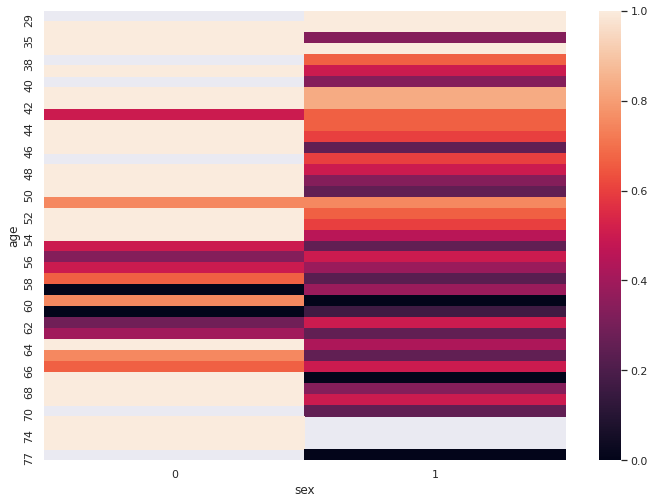

In [ ]:
'''Pivot Table heat map'''

heart_pivot = heart.pivot_table(index = "age",columns='sex',values='output')

sns.heatmap(heart_pivot) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73cc874d90>,
      dtype=object)

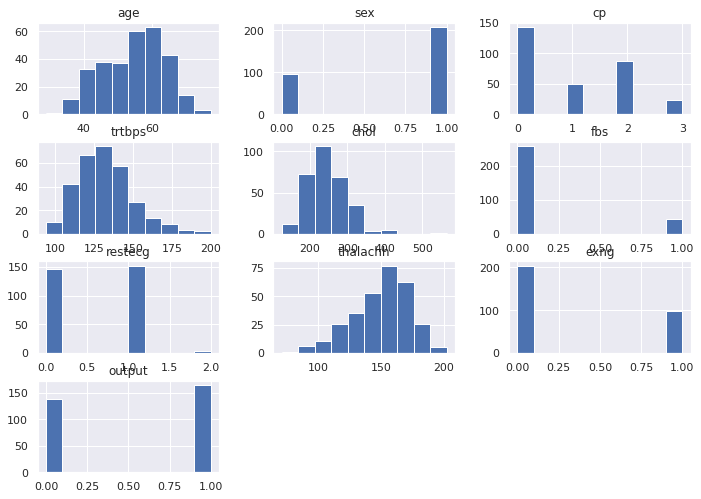

In [ ]:
''' Checking the distribution of each variable '''
heart.hist()

---
# **Applying the Machine Learning Models**

# **NAIVE BAYES CLASSIFER**

We will now predict the output on the basis of Naive Bayes Classifier.

The output depicts whether the patient has a high chance of having a heart attack or a low chance.

The data is split into two: 75% as training set and 25% as testing set.

In [ ]:
''' Making separate dataframes for the independent and dependent variables
(features vs. result/target) '''

X = heart.drop(columns=['output', 'output_desc', 'sex_desc'], axis=1)    
Y = heart['output']

X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng
0,63,1,3,145,233,1,0,150,0
1,37,1,2,130,250,0,1,187,0
2,41,0,1,130,204,0,0,172,0
3,56,1,1,120,236,0,1,178,0
4,57,0,0,120,354,0,1,163,1


In [ ]:
''' Splitting the Data Set'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

''' Testing the Gaussian Naive Bayes Model '''

model = GaussianNB()
model.fit(X_train, Y_train)

# Predicting the results and setting up confusion matrices
test_pred = model.predict(X_test)
cm_test = confusion_matrix(test_pred, Y_test)

train_pred = model.predict(X_train)
cm_train = confusion_matrix(train_pred, Y_train)

print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1]) / len(Y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1]) / len(Y_test)))

Accuracy for training set for Naive Bayes = 0.8105726872246696
Accuracy for test set for Naive Bayes = 0.6578947368421053


# **LOGISTIC REGRESSION**

Logistic Regression predicts the output/target based on probability.

In this classifier we will be using the Scikit-Learn Library's Logistic Regression functions.


In [ ]:
''' Splitting of Data into training and testing data set '''

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1) # 25% test size, gets random sample everytime (shuffle=True)

In [ ]:
''' Applying Logistic regression on Training Data '''

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
''' Predicting Output of Testing Data '''

y_pred_training = logreg.predict(X_train)
print('Accuracy of the Logistic Regression Classifier on Training Data: ', logreg.score(X_train, y_train))

y_pred_testing = logreg.predict(X_test)
print('Accuracy of the Logistic Regression Classifier on Testing Data: ', logreg.score(X_test, y_test))

Accuracy of the Logistic Regression Classifier on Training Data:  0.8193832599118943
Accuracy of the Logistic Regression Classifier on Testing Data:  0.7105263157894737


Note that for both models, we indicated a random_state for reproducibility. This returns the same accuracy for each model each time the code is run so we can compare the two models easily. The models gave the following results (rounded up to two decimal places):

Model | Training Accuracy | Testing Accuracy 
 --- | :---:| :---: |
 Naive Bayes | 0.81 | 0.66
 Logistic Regression | 0.82 | 0.71


 As we can see, Logistic Regression returned better accuracies for both training and testing sets. To further investigate on this, we can use other metrics such as the f1-score to confirm which model performs better.

---
# *COMPARING THE TWO CLASSIFIERS*

Here we compare the accuracies of both models (Naive Bayes and Logistic Regression Classifiers). We want to confirm which of the two classifiers is best suited for predicting heart attack possibilities. We can do this by getting the f1-score of each model.

The f1-score shows the balance between the model's precision and recall.

In [ ]:
from sklearn.metrics import accuracy_score

# splitting the dataset into training and testing
X = heart.drop(columns=['output', 'output_desc', 'sex_desc'], axis=1)
Y = heart['output']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4) # random_state for reproducibility, remove if not needed

# initializing the models
nb = GaussianNB()
lr = LogisticRegression()

models = [nb, lr]

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model GaussianNB is 0.78
              precision    recall  f1-score   support

           0       0.81      0.64      0.71        33
           1       0.76      0.88      0.82        43

    accuracy                           0.78        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.78      0.77        76



The accuracy of model LogisticRegression is 0.86
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The classification report above shows that Logistic Regression returns a higher f1-score for classes 0 and 1 which connotes that it can identify true positives more accurately than the Naive Bayes model. It also showed higher precision and recall values, supporting the fact that it has a higher accuracy compared to the latter. 

To further understand this, let's make a boxplot comparing the two models.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: mean accuracy = 0.738172, standard deviation accuracy = 0.119176
NB: mean accuracy = 0.738495, standard deviation accuracy = 0.098389


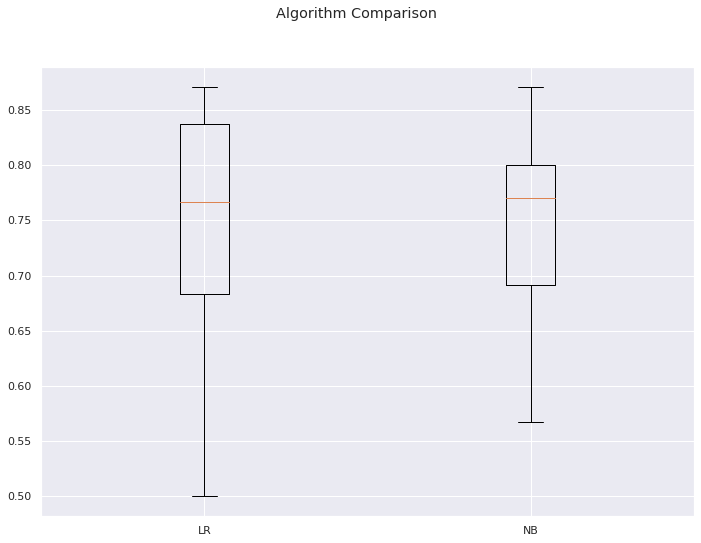

In [ ]:
# importing model_selection (used for kfold)
from sklearn import model_selection

# splitting the dataset into training and testing
X = heart.drop(columns=['output', 'output_desc', 'sex_desc'], axis=1)
Y = heart['output']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) # random_state for reproducibility, remove if not needed

# setting a seed for reproducibility
seed = 7

# preparing the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# main loop to evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: mean accuracy = %f, standard deviation accuracy = %f" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot to compare the models
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Although Naive Bayes showed a shorter range of accuracy scores achieved, it is notable that both models have approximately the same maximum values for accuracy. However, Logistic Regression has more predictions with higher accuracies (more values belonging between the 25th and 75th percentile) compared to Naive Bayes.

---
# **CONCLUSION**

Both models performed well in predicting the output/target. However, it is obvious that Logistic Regression showed a better performance compared to Naive Bayes, showing higher accuracy and f1-scores to the latter. Therefore, Logistic Regression is the more fitting model to be used in predicting whether patients will have a heart attack or not based on the demographic and health factors identified earlier in this analysis.

---
---
# **Authors:**

[Runjhun Ratawal](https://www.linkedin.com/in/runjhunratawal/)

[Shaira Lapus](https://www.linkedin.com/in/shaira-lapus/)